In [1]:
import numpy             as np
import matplotlib.pyplot as plt

from scipy  import signal
from random import choice
from math   import ceil

In [2]:
SAMPLING_RATE = 22050
T_s = 1/SAMPLING_RATE
K = 14
W = 2000
G = 1
BITS_PER_BYTE  = 8
NUMBER_OF_BITS = 150 * BITS_PER_BYTE

In [4]:
bool_list = [choice([True, False]) for _ in range(NUMBER_OF_BITS)]
print(bool_list)

[True, False, False, False, False, False, False, False, True, True, False, True, False, False, False, False, False, True, True, False, False, True, True, False, False, True, True, False, True, False, True, False, False, False, True, False, False, True, False, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, False, False, False, False, False, True, True, False, False, True, True, True, True, True, True, False, True, False, True, False, True, True, False, False, True, True, True, False, False, True, False, False, True, False, False, False, True, True, False, False, False, True, True, True, False, True, False, False, False, False, True, True, True, False, False, False, False, False, True, False, True, True, True, False, False, True, True, False, True, False, True, True, True, False, True, True, False, True, True, False, False, True, False, True, True, True, True, True, False, True, False, False, True, True, True, True, F

In [5]:
signal = [G if b else -G for b in bool_list]

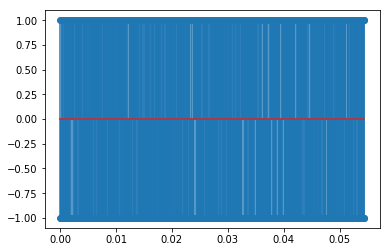

In [11]:
time = np.linspace(0, T_s*NUMBER_OF_BITS, NUMBER_OF_BITS)
plt.stem(time, signal)
plt.show()